In [1]:
!pip install -r requirements.txt

  Cloning https://github.com/openai/CLIP.git (to revision a1d071733d7111c9c014f024669f959182114e33) to /tmp/pip-install-ivzam4o1/clip_cf6b7bab1d5b4d3a98624421630522da
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-ivzam4o1/clip_cf6b7bab1d5b4d3a98624421630522da
  Running command git rev-parse -q --verify 'sha^a1d071733d7111c9c014f024669f959182114e33'
  Running command git fetch -q https://github.com/openai/CLIP.git a1d071733d7111c9c014f024669f959182114e33
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done


In [3]:
import torch, lpips
from utils import show_images_horizontally, load_and_process_images, compute_smoothness_and_consistency
from prior import bayesian_prior_selection
from pipeline_interpolated_stable_diffusion import InterpolationStableDiffusionPipeline

In [4]:
pipe = InterpolationStableDiffusionPipeline(repo_name="runwayml/stable-diffusion-v1-5", guidance_scale=10.0, scheduler_name="unipc")
    
# Initialize the generator
vae_scale_factor = 8
channel = pipe.unet.config.in_channels
height = pipe.unet.config.sample_size * vae_scale_factor
width = pipe.unet.config.sample_size * vae_scale_factor
torch_device = "cuda"
generator = torch.cuda.manual_seed(1002)
    
latent = torch.randn(
    (1, channel, height // vae_scale_factor, width // vae_scale_factor),
    generator=generator,
    device=torch_device,
)

num_inference_steps = 50
lpips_model = lpips.LPIPS(net="vgg").to("cuda")

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/home/qiyuan/.conda/envs/AID/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/qiyuan/.conda/envs/AID/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/qiyuan/.conda/envs/AID/lib/python3.10/site-packages/lpips/weights/v0.1/vgg.pth


100%|██████████| 50/50 [00:23<00:00,  2.17it/s]


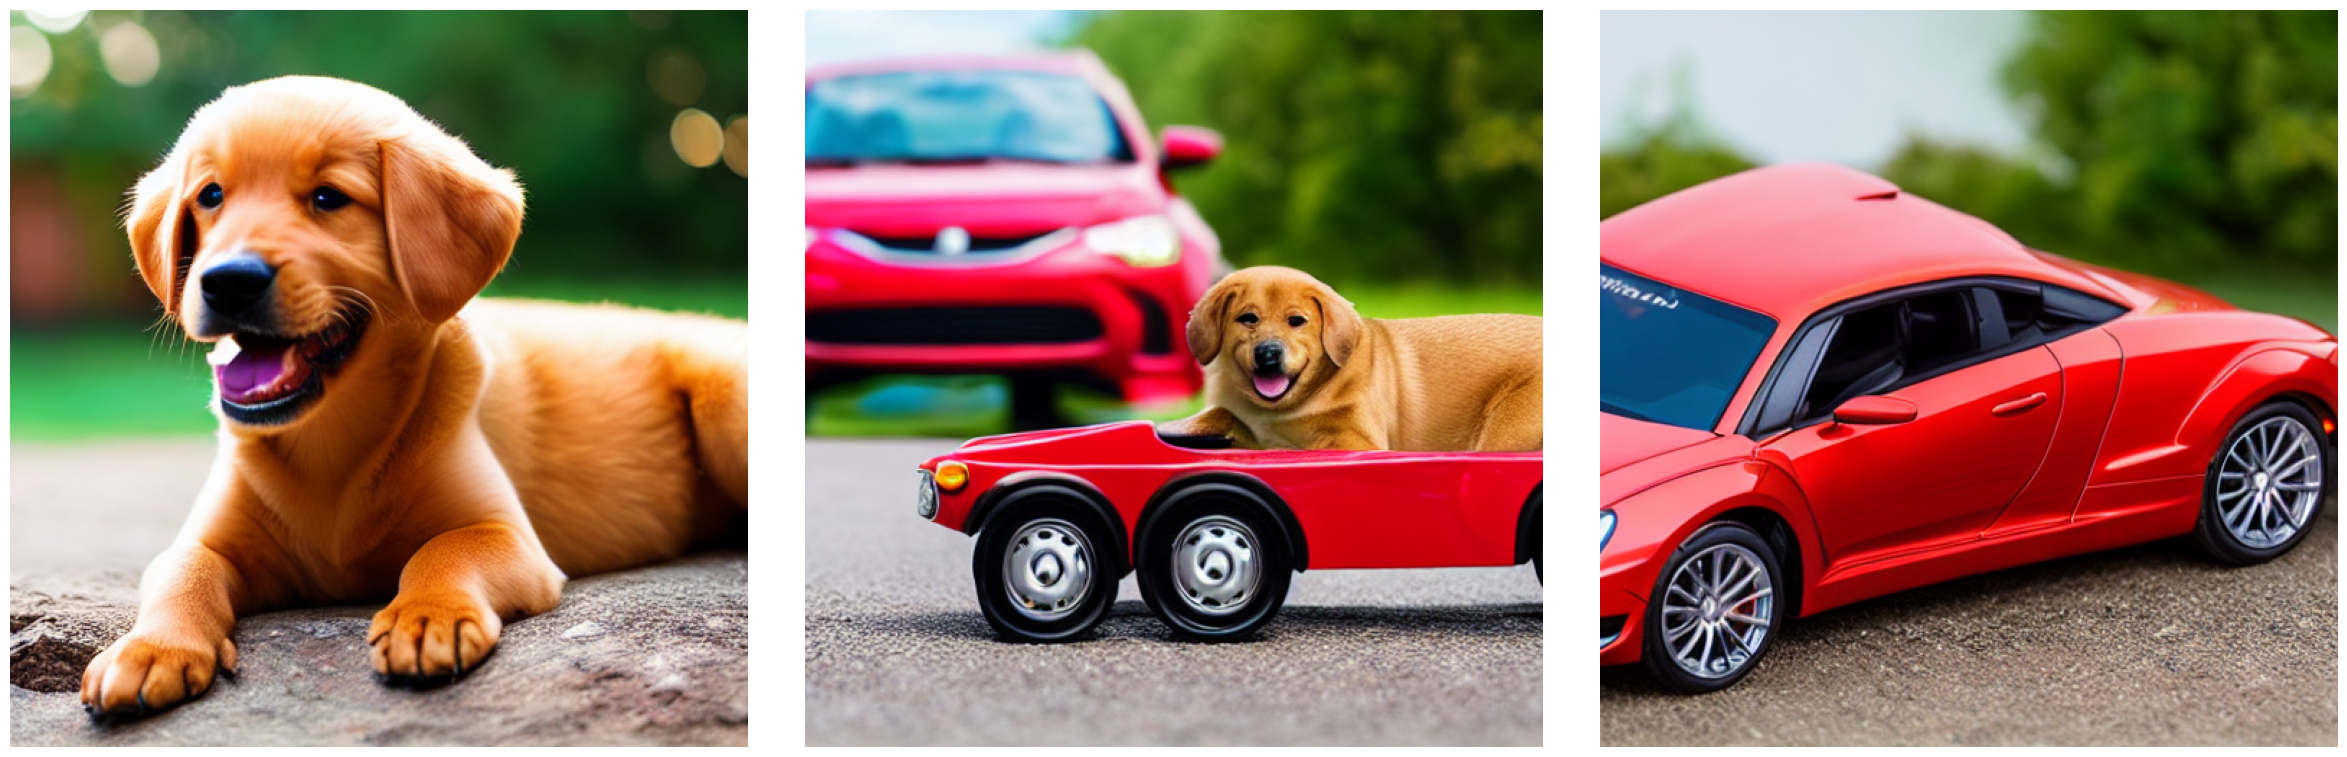

0.9776465606662472 0.44284670054912567


In [5]:
warmup_ratio = 6.1 / 50
early = "fused_inner"
late = "self"
guide_prompt = "A photo of a dog driving a car, logical, best quality, extremely detailed"
negative_prompt = "monochrome, lowres, bad anatomy, worst quality, low quality"

prompt1 = "A photo of dog, best quality, extremely detailed"
prompt2 = "A photo of car, best quality, extremely detailed"
alpha = 6
beta = 3
images = pipe.interpolate_save_gpu(latent, latent, prompt1, prompt2, guide_prompt=guide_prompt, size=3, 
                                       num_inference_steps=num_inference_steps, warmup_ratio=warmup_ratio, early=early, late=late, alpha=alpha, beta=beta, negative_prompt=negative_prompt)
show_images_horizontally(images, interact=True)
smoothness, consistency, _ = compute_smoothness_and_consistency(images, lpips_model)
print(smoothness, consistency)

In [ ]:
warmup_ratio = 8.1 / 50
early = "fused_inner"
late = "self"
guide_prompt = "A photo of a toy named dog-car, logical, best quality, extremely detailed"
negative_prompt = "monochrome, lowres, bad anatomy, worst quality, low quality"

prompt1 = "A photo of dog, best quality, extremely detailed"
prompt2 = "A photo of car, best quality, extremely detailed"
alpha = 8
beta = 8
images = pipe.interpolate_save_gpu(latent, latent, prompt1, prompt2, guide_prompt=guide_prompt, size=3, 
                                       num_inference_steps=num_inference_steps, warmup_ratio=warmup_ratio, early=early, late=late, alpha=alpha, beta=beta, negative_prompt=negative_prompt)
show_images_horizontally(images, prompt1="a dog", prompt2="a car", interact=True)
smoothness, _, _ = compute_smoothness_and_consistency(images, lpips_model)
print(smoothness)

In [ ]:
warmup_ratio = 8.1 / 50
early = "fused_inner"
late = "self"
guide_prompt = "A photo of a car with furry texture, logical, best quality, extremely detailed"
negative_prompt = "monochrome, lowres, bad anatomy, worst quality, low quality"

prompt1 = "A photo of dog, best quality, extremely detailed"
prompt2 = "A photo of car, best quality, extremely detailed"
alpha = 8
beta = 8
images = pipe.interpolate_save_gpu(latent, latent, prompt1, prompt2, guide_prompt=guide_prompt, size=3, 
                                       num_inference_steps=num_inference_steps, warmup_ratio=warmup_ratio, early=early, late=late, alpha=alpha, beta=beta, negative_prompt=negative_prompt)
show_images_horizontally(images, prompt1="a dog", prompt2="a car", interact=True)
smoothness, _, _ = compute_smoothness_and_consistency(images, lpips_model)
print(smoothness)

In [ ]:
warmup_ratio = 1.0
early = "fused_inner"
late = "self"
guide_prompt = "A photo of a car with dog head, logical, best quality, extremely detailed"
negative_prompt = "monochrome, lowres, worst quality, low quality"

prompt1 = "A photo of dog, best quality, extremely detailed"
prompt2 = "A photo of car, best quality, extremely detailed"
alpha = 29.75
beta = 20
images = pipe.interpolate_save_gpu(latent, latent, prompt1, prompt2, guide_prompt=guide_prompt, size=3, 
                                       num_inference_steps=num_inference_steps, warmup_ratio=warmup_ratio, early=early, late=late, alpha=alpha, beta=beta, negative_prompt=negative_prompt)
show_images_horizontally(images, prompt1="a dog", prompt2="a car", interact=True)
smoothness, _, _ = compute_smoothness_and_consistency(images, lpips_model)
print(smoothness)

In [ ]:
warmup_ratio = 20.1/50
num_inference_steps = 50
early = "fused_inner"
late = "self"
guide_prompt = "A product display of toy named Gundam-Pikachu, best quality, extremely detailed"
negative_prompt = "monochrome, lowres, bad anatomy, worst quality, low quality"

prompt1 = "A product display of toy named Pikachu, Pokemon created by Game Freak and Nitendo, best quality, extremely detailed"
prompt2 = "A product display of toy named Gundam, Mobile Suit Gundam Figure Gundam Universe, Bandai Tamashii Nations, best quality, extremely detailed"

alpha = 6
beta = 2
images = pipe.interpolate_save_gpu(latent, latent, prompt1, prompt2, guide_prompt=guide_prompt, size=7, 
                                       num_inference_steps=num_inference_steps, warmup_ratio=warmup_ratio, early=early, late=late, alpha=alpha, beta=beta, negative_prompt=negative_prompt)
show_images_horizontally(images, interact=True)
smoothness, _, _ = compute_smoothness_and_consistency(images, lpips_model)
print(smoothness)